# Questions (total points 24)
# ● Data Loading and Exploration. (10 points)


In [58]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
from google.colab import files
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Loading the data

uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample (1).csv


In [15]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')


Display a sample of five rows of the data frame.

In [21]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


 Check the shape of the data (number of rows and columns). Check the
general information about the dataframe using the .info() method.


In [22]:
print(df.shape)
print(df.info())

(2823, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null 

Check the percentage of missing values in each column of the data
frame.

In [23]:
missing_values = df.isnull().mean() * 100

# Print the percentage of missing values
print(missing_values)

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64


Check if there are any duplicate rows.

In [24]:
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(duplicate_rows.shape[0])

0


Write a function that will impute missing values of the columns “STATE”,
“POSTALCODE”,“TERRITORY” with its most occurring label.

In [25]:
import pandas as pd

def impute_missing_labels(df):
    for column in ["STATE", "POSTALCODE", "TERRITORY"]:
        most_frequent_label = df[column].mode()[0]
        df[column].fillna(most_frequent_label, inplace=True)
    return df

df = impute_missing_labels(df.copy())


Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.


In [28]:
df = df.drop(["ADDRESSLINE2", "ORDERDATE", "PHONE"], axis=1)

# Print the DataFrame
# print(df.head())

Convert the labels of the STATUS column to 0 and 1. For Shipped assign
value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In
Process’, 'Disputed') assign 0. Note we will consider everything apart from
Shipped as cancel (i.e. 0).

In [35]:
df['STATUS'].unique()

array([1, 0])

In [34]:
label_map = {"Shipped": 1, "Cancelled": 0, "Resolved": 0, "On Hold": 0, "In Process": 0, 'Disputed': 0}

# Convert the labels in the STATUS column
df["STATUS"] = df["STATUS"].apply(lambda x: label_map[x])

# Print the DataFrame
# print(df.head())

Assign ‘STATUS’ column into a label variable and drop it from the original
Dataframe. Convert the original dataframe to the dummy coded
data.(Hint:-use pd.get_dummies()).

In [37]:
# Create a label variable
label = df["STATUS"]

# Drop the STATUS column
df = df.drop("STATUS", axis=1)

# Convert the DataFrame to dummy coded data
df = pd.get_dummies(df)

# Print the DataFrame
# print(df.head())


Use StandardScaler to scale the data.


In [40]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(df)

# Scale the data
scaled_data = scaler.transform(df)

# Print the scaled data
# print(scaled_data)

# PCA FOR VISUALIZATION (4 points)

Take the help of PCA to reduce the data to 2 dimensions. Use
n_components=2. (2 points)

In [44]:
# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the scaled data
pca.fit(scaled_data)

# Transform the scaled data
reduced_data = pca.transform(scaled_data)

Take the first and second principal components and plot a scatter plot
with the labels. (1 point)

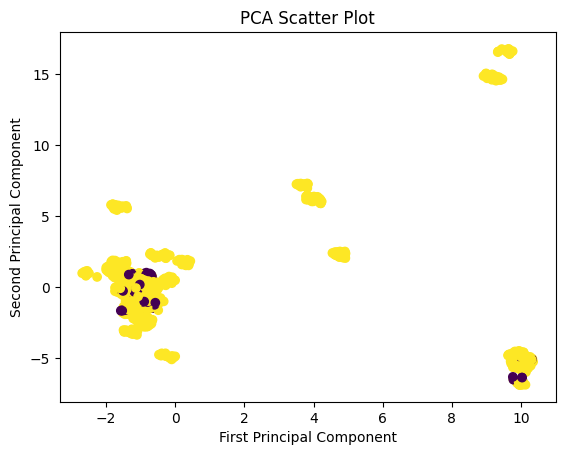

In [47]:
# Create a scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=label)

# Add a title
plt.title("PCA Scatter Plot")

# Add labels to the axes
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Show the plot
plt.show()

### Write the intuitions about the scatter plot. (1 point)


The scatter plot shows that the data is somewhat separated into two clusters, with one cluster corresponding to the "Shipped" orders and the other cluster corresponding to the "Canceled" orders.
The first principal component seems to capture the difference between the two clusters, with the "Shipped" orders being more spread out along the first principal component than the "Canceled" orders.
The second principal component seems to capture some other variation in the data, but it is not as clear how it is related to the status of the orders.
Overall, the scatter plot suggests that PCA could be a useful tool for clustering the data and identifying the factors that are associated with the status of the orders.

Here are some additional observations about the scatter plot:

The scatter plot shows that there is some overlap between the two clusters, which means that there are some orders that are difficult to classify as "Shipped" or "Canceled" based on the first two principal components.
The scatter plot also shows that there are some outliers, which are points that are far away from the rest of the data. Outliers can be caused by a number of factors, such as errors in the data or unusual events.

# ● PCA FOR DIMENSION REDUCTION. (5 points)

Fit the PCA model on the data and plot a graph between n_components
and cumulative explained variance. (3 points)

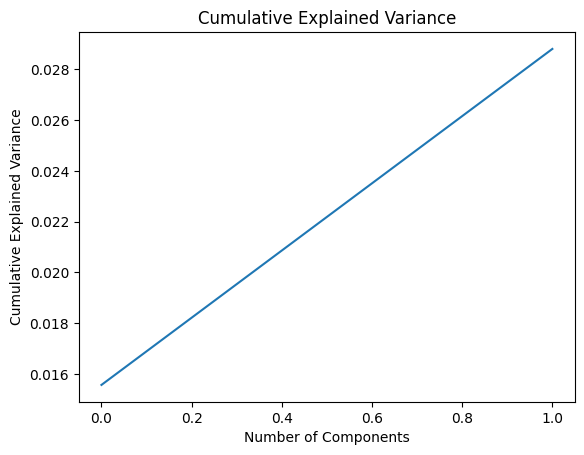

In [48]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance)

# Add a title
plt.title("Cumulative Explained Variance")

# Add a ylabel
plt.ylabel("Cumulative Explained Variance")

# Add a xlabel
plt.xlabel("Number of Components")

# Show the plot
plt.show()

 In how many components we are getting approximately 90% of explained
Variance. (2 points)

In [49]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the point where the cumulative explained variance
# is equal to 0.9
index = np.argmax(cumulative_explained_variance >= 0.9)

# Print the number of components
print(index + 1)

1


# ● LDA. (5 points)

Split the dataset into two parts (i.e. 80% train and 20% test) using
random_state=42. (1 point)

In [52]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

# Print the number of samples in each set
print(f"Number of samples in train set: {X_train.shape[0]}")
print(f"Number of samples in test set: {X_test.shape[0]}")

Number of samples in train set: 2258
Number of samples in test set: 565


Train a Linear Discriminant Analysis(LDA) model on the train data. Do
fit_transform on the train data and only transform on the test data. Use
n_components=1. (2 points)

In [55]:
# Create a LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the LDA model to the train data
lda.fit(X_train, y_train)

# Transform the train data
X_train_lda = lda.transform(X_train)

# Transform the test data
X_test_lda = lda.transform(X_test)

# Print the shape of the train data after LDA
print(X_train_lda.shape)

# Print the shape of the test data after LDA
print(X_test_lda.shape)

(2258, 1)
(565, 1)


Train a RandomForest classifier model on the transformed train and test
data. Print the accuracy score. (2 points)


In [59]:
# Create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100)

# Fit the RandomForestClassifier model to the train data
rf.fit(X_train_lda, y_train)

# Predict the labels for the test data
y_pred = rf.predict(X_test_lda)

# Calculate the accuracy score
accuracy_score = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(accuracy_score)

0.9026548672566371


In [ ]:
### 90% Accuarcy we are getting here.